University of Helsinki, Master's Programme in Mathematics and Statistics  
MAST32001 Computational Statistics, Autumn 2023  
Luigi Acerbi  
Based on notebook by Antti Honkela

# Lecture 1: Floating point numbers and numerics of probabilities

## Floating point number basics

Real numbers are typically represented as floating point numbers in computers. Floating point numbers use a fixed storage size and hence can offer only finite precision. Floating point numbers do not fulfill the usual axioms of real numbers, which means they can sometimes behave in unexpected ways.

Background reading on floating point numbers:

http://floating-point-gui.de/formats/fp/  
http://floating-point-gui.de/errors/rounding/  
http://floating-point-gui.de/errors/comparison/  
http://floating-point-gui.de/errors/propagation/  
https://hal.archives-ouvertes.fr/hal-00128124v5/document  
and references therein.

## Useful links

https://courses.helsinki.fi/fi/aycsm90004en/135221588 : "Data Analysis with Python" MOOC  
http://www.learnpython.org/ : Nice interactive Python tutorial  
https://docs.python.org/3/tutorial/index.html : Official documentation for Python3  
https://docs.scipy.org/doc/numpy/user/quickstart.html : Tutorial for one of the most important Python modules, SciPy  

### 1. Computing with floating point numbers

Write a program to increment `x = 0.0` by `0.1` 100 times. Compute `x - 10`. How do you interpret the result?

Check other examples with different increments. In which cases can you get an exact result? Can you come up with a class of instances where the result is exact?

In [119]:
# You can write your Python code here
x = 0.0

for _ in range(100):
    x += 0.1
    
x - 10

-1.9539925233402755e-14

### 2. Computing log-probabilities

Probabilities can sometimes be difficult to compute with floating point numbers as they can be very small non-negative numbers. These problems can often be avoided by using logarithms and storing $ \log(p) $ instead of $ p $.

Compute numerically the following probabilities and report them in the format $x \cdot 10^y$:
1. The probability of randomly drawing the 8191-letter HIV-1 genome from the 4-letter DNA alphabet.
2. The probability that you need exactly 5000 throws of a regular 6-sided die to get the first 6. (*Hint*: [Geometric distribution](https://en.wikipedia.org/wiki/Geometric_distribution).)
3. The probability that $ x = 200 $ when $ x \sim \mathrm{Poisson}(1)$.

*Hints*: 
- The Python package Numpy contains basic numerical functions you will need. Just use `np.log()` for `log()` etc. You can use the properties of logarithms to convert natural logarithms to base 10 to make them more human-readable.
- As commonly done, in point 3 above we denoted with $x \sim P(\theta)$ that $x$ is an instance of a random variable drawn from the probability density (or probability mass function) $P$ with parameters $\theta$. In example 3, $P$ is a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) with rate parameter $\lambda = 1$.

In [120]:
import numpy as np
from scipy.stats import poisson

# Define a function to print the values in the requested format.
# For all y, we have
#   p = 10^log10p = 10^(log10p - y) * 10^y
# where the logarithm is in base 10.
# By choosing y to be largest integer not greater than log10p, we have 1 <= x < 10.
# def pretty_print_log10(log10p):

#1
logp1 = np.sum([np.log10(1/4) for _ in range(8191)])
print(logp1)
print(np.log10(1/4) * 8191)
#2
logp2 = np.sum([np.log10(5/6) for _ in range(4999)]) + np.log10(1/6)
print(logp2)

#3
print(1 - poisson.cdf(100, 1))


-4931.47338896734
-4931.47338896734
-396.60520024246
0.0


### 3. Log-sum-exp trick when working with log-probabilities

Assuming one is working with log-probabilities as suggested above, one often runs into the need to normalise a set of log-probabilities $\textbf{x} = (x_1, \ldots, x_N)$. To do this, it is necessary to compute
$$ z = \log\left( \sum_{i=1}^N \exp(x_i) \right). $$
This can be difficult as $ \exp() $ can very easily overflow or underflow. These problems can be avoided by using the log-sum-exp (or logsumexp) trick discussed e.g. at
https://lips.cs.princeton.edu/computing-log-sum-exp/

1. Try to compute $ z $ directly for $\textbf{x} = [-1000, -999, -1000]$.
2. Compute $z$ again using the log-sum-exp trick.

In [121]:
import numpy as np
#1
x = np.array([-1000, -999, -1000])

z = np.log10(np.sum(np.exp(x)))
print(z)
#2
# log-sum-exp trick: subtract max(x) before taking exp() and add it back afterwards
# Suggestion: write a logsumexp function first
max = np.max(x)
norm_x = x - max
sum = np.log(np.sum(np.exp(norm_x))) + max

print(sum)

-inf
-998.448555286068


/var/folders/32/38vlh0g54yq0mx_cl1lqgzhc0000gn/T/ipykernel_21685/36776717.py:5: RuntimeWarning: divide by zero encountered in log10
  z = np.log10(np.sum(np.exp(x)))


### 4. Useful special functions

Probability distributions often involve special functions such as the [gamma function](https://en.wikipedia.org/wiki/Gamma_function) $\Gamma(z)$. The gamma function is also useful as $ n! = \Gamma(n+1) $, where $n!$ is $n$ factorial. Note that almost all numerical packages will offer a function that directly computes the *logarithm* of the Gamma function (often called something like `gammaln`).

1. Check the manual of the Python package `scipy.special` to find the different forms of gamma function it offers.
2. Redo task 3 of Exercise 2 using a suitable gamma function call from `scipy.special`.

In [122]:
#2
from scipy.special import gammaln

### 5. Numerical algorithms

As an example of a numerical computation, let us consider the estimation of the variance of $ n $ numbers $ x_1, \dots, x_n $.

Denoting the mean of the numbers by $ \bar{x}, $ the unbiased estimate of the sample variance is
$$ s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2 =
  \frac{1}{n-1} \sum_{i=1}^n (x_i^2 - 2 x_i \bar{x} + \bar{x}^2) =
  \frac{1}{n-1} \left(\sum_{i=1}^n x_i^2 - 2 n \bar{x}^2 + n \bar{x}^2\right) =
  \frac{1}{n-1} \left(\sum_{i=1}^n x_i^2 - n \bar{x}^2\right) =
  \frac{1}{n-1} \left(\sum_{i=1}^n x_i^2 - \frac{1}{n} (\sum_{i=1}^n x_i)^2\right).
$$

The variance can be estimated in a numerically stable manner using the first form, but this requires two passes through the data: first to compute the mean and then the second time to compute the sum of squared differences. The last form can be evaluated in single pass, but computing the difference of two potentially large positive numbers is numerically unstable.

1. Write a function for computing the variance of a given array of numbers using the two-pass approach:
$$ \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i $$
$$ s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2 $$
2. Write a function for computing the variance of a given array of numbers using the one-pass approach:
$$ s^2 = \frac{1}{n-1} \left(\sum_{i=1}^n x_i^2 - \frac{1}{n} (\sum_{i=1}^n x_i)^2\right). $$
3. Test your functions by generating 1000 random number from the distribution $ N(10^9, 1) $. (*Hint*: `numpy.random.randn()`)
4. Implement Welford's accurate one-pass algorithm and test it with your data. (See e.g. http://jonisalonen.com/2013/deriving-welfords-method-for-computing-variance/)

[-0.27233642  0.06285149]


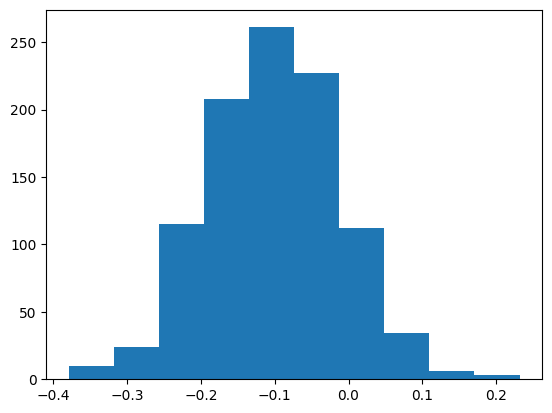

In [7]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

npr.seed(42)
x = npr.normal(size=100)
means = np.zeros(10000) 
for i in range(10000):
    I = npr.randint(100, size=100)
    means[i] = np.mean(x[I]) 

plt.hist(means, bins=50)
print(np.percentile(means, [2.5, 97.5]))

### Bonus extra: Early history of digital computers

Statistics and computers have a long common history, and the first electronic computer Colossus was built by the British to perform statistical computations for breaking a German cryptosystem during World War II. This relatively unknown part of history is reported in detail in
http://www.rutherfordjournal.org/article030109.html